# Table of contents
### Import data and libraries
### Data wrangling
### Plotting visualizations
### Questions

# Importing data and libraries

## Import libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Set path

In [83]:
path = r'C:\Users\Andrew\Desktop\Data project'

## import data

In [84]:
citi22 = pd.read_pickle(os.path.join(path, '02 data', 'clean', 'citi22.pkl'))

In [85]:
citi22.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_latitude,start_longitude,end_latitude,...,member_type,start hour,start day,weekday,month,TripMins,trip_mins,start_station_frequency,end_station_frequency,member
0,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,...,1,18,26,2,1,0 days 00:01:14,1.23,17060,17518,1
1,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,...,1,13,28,4,1,0 days 00:06:16,6.27,5834,5989,1
2,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,...,1,19,10,0,1,0 days 00:05:24,5.40,5834,5989,1
3,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,...,1,7,26,2,1,0 days 00:00:25,0.42,17060,17518,1
4,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,...,1,18,13,3,1,0 days 00:00:57,0.95,17060,17518,1


In [86]:
citi22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 892281 entries, 0 to 48584
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   rideable_type            892281 non-null  object         
 1   started_at               892281 non-null  datetime64[ns] 
 2   ended_at                 892281 non-null  datetime64[ns] 
 3   start_station_name       892281 non-null  object         
 4   start_station_id         892281 non-null  object         
 5   end_station_name         892281 non-null  object         
 6   end_station_id           892281 non-null  object         
 7   start_latitude           892281 non-null  float64        
 8   start_longitude          892281 non-null  float64        
 9   end_latitude             892281 non-null  float64        
 10  end_longitude            892281 non-null  float64        
 11  member_type              892281 non-null  int32          
 12  sta

# Data wrangling

## Adjust cell typing for analysis

In [87]:
citi22['start hour'] = citi22['start hour'].astype('int')
citi22['start day'] = citi22['start day'].astype('int')
citi22['weekday'] = citi22['weekday'].astype('int')
citi22['month'] = citi22['month'].astype('int')
citi22['member'] = citi22['member_type'].astype('int')

### Create a column to display trip time in minutes

In [88]:
citi22['TripMins'] = citi22['ended_at'] - citi22['started_at']

In [89]:
citi22['trip_mins'] = ((citi22['ended_at'] - citi22['started_at']).dt.total_seconds() / 60).round(2)

In [90]:
citi22.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_latitude,start_longitude,end_latitude,...,member_type,start hour,start day,weekday,month,TripMins,trip_mins,start_station_frequency,end_station_frequency,member
0,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,...,1,18,26,2,1,0 days 00:01:14,1.23,17060,17518,1
1,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,...,1,13,28,4,1,0 days 00:06:16,6.27,5834,5989,1
2,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,...,1,19,10,0,1,0 days 00:05:24,5.40,5834,5989,1
3,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,...,1,7,26,2,1,0 days 00:00:25,0.42,17060,17518,1
4,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,...,1,18,13,3,1,0 days 00:00:57,0.95,17060,17518,1


### Creating weekday/weekend flag

In [93]:
citi22.loc[(citi22['weekday'] == 0), 'day_type'] = 'weekend'
citi22.loc[(citi22['weekday'] == 1), 'day_type'] = 'weekday'
citi22.loc[(citi22['weekday'] == 2), 'day_type'] = 'weekday'
citi22.loc[(citi22['weekday'] == 3), 'day_type'] = 'weekday'
citi22.loc[(citi22['weekday'] == 4), 'day_type'] = 'weekday'
citi22.loc[(citi22['weekday'] == 5), 'day_type'] = 'weekend'
citi22.loc[(citi22['weekday'] == 6), 'day_type'] = 'weekend'

### Create column displaying frequency of start/end stations

In [95]:
citi22['start_station_frequency'] = citi22.groupby('start_station_name')['start_station_name'].transform('count')
citi22['end_station_frequency'] = citi22.groupby('end_station_name')['end_station_name'].transform('count')

In [96]:
citi22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 892281 entries, 0 to 48584
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   rideable_type            892281 non-null  object         
 1   started_at               892281 non-null  datetime64[ns] 
 2   ended_at                 892281 non-null  datetime64[ns] 
 3   start_station_name       892281 non-null  object         
 4   start_station_id         892281 non-null  object         
 5   end_station_name         892281 non-null  object         
 6   end_station_id           892281 non-null  object         
 7   start_latitude           892281 non-null  float64        
 8   start_longitude          892281 non-null  float64        
 9   end_latitude             892281 non-null  float64        
 10  end_longitude            892281 non-null  float64        
 11  member_type              892281 non-null  int32          
 12  sta

### Create a df without lat/long stats since they wont be needed for current analysis

In [97]:
citi_2 = citi22.drop(columns = ['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude'])

In [98]:
citi_2.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_type,start hour,start day,weekday,month,TripMins,trip_mins,start_station_frequency,end_station_frequency,member,day_type
0,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,1,18,26,2,1,0 days 00:01:14,1.23,17060,17518,1,weekday
1,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,1,13,28,4,1,0 days 00:06:16,6.27,5834,5989,1,weekday
2,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,1,19,10,0,1,0 days 00:05:24,5.40,5834,5989,1,weekend
3,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,1,7,26,2,1,0 days 00:00:25,0.42,17060,17518,1,weekday
4,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,1,18,13,3,1,0 days 00:00:57,0.95,17060,17518,1,weekday


# Plotting visualizations

### Create a subplot with matplotlib and display a correlation heatmap

C:\Users\Andrew\AppData\Local\Temp\ipykernel_15384\2274753693.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(citi_2.corr(), annot = True, ax = ax)


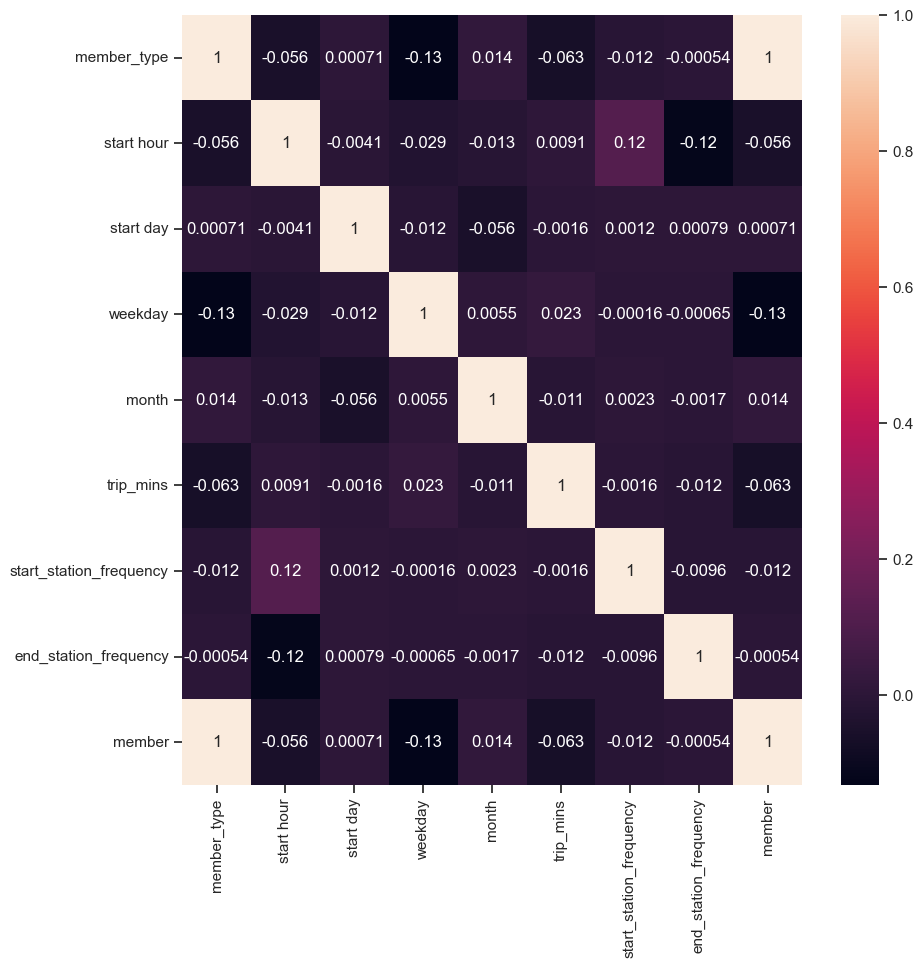

In [99]:
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(citi_2.corr(), annot = True, ax = ax) 

### There do not seem to be any strong correlations on either side of the true neutral point. although the connection that makes the most sense would be between trip time (trip_mins) and the day of the week (weekday).

## Creating trip time/weekday scatterplot

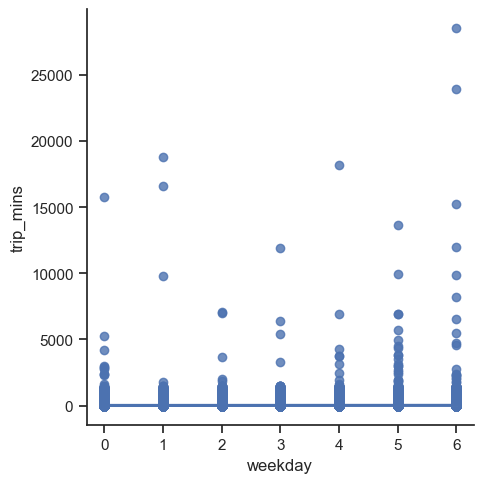

In [100]:
weekday_trip_time_plot = sns.lmplot(x = 'weekday' , y = 'trip_mins', data = citi_2)

In [101]:
weekday_trip_time_plot = weekday_trip_time_plot.figure
weekday_trip_time_plot.savefig(os.path.join(path, '04 Analysis', 'trip_day.png'))

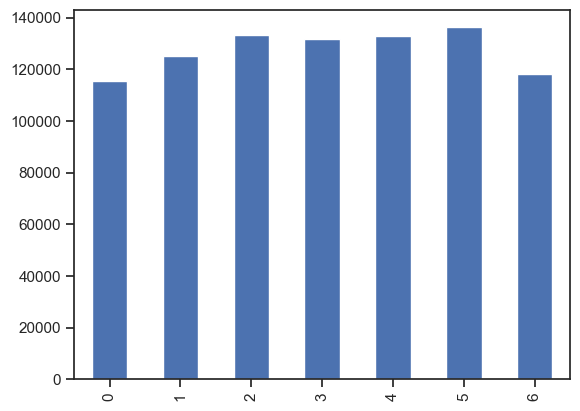

In [104]:
weekday_counts = citi22['weekday'].value_counts().sort_index().plot.bar()

In [105]:
weekday_counts.figure.savefig(os.path.join(path, '04 Analysis', 'weekday_counts.png'))

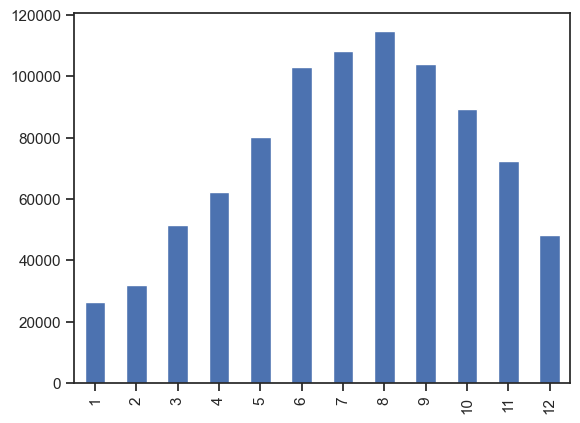

In [106]:
month_counts = citi22['month'].value_counts().sort_index().plot.bar()

In [107]:
month_counts.figure.savefig(os.path.join(path, '04 Analysis', 'month_counts.png'))

### After looking at the graph we dont see the strongest correlation, but we do see a trend. We see the begining of the week start strong, and then drop down around tuesday before spiking towards the end of the week and finally peaking on saturday.

## Creating a pairplot

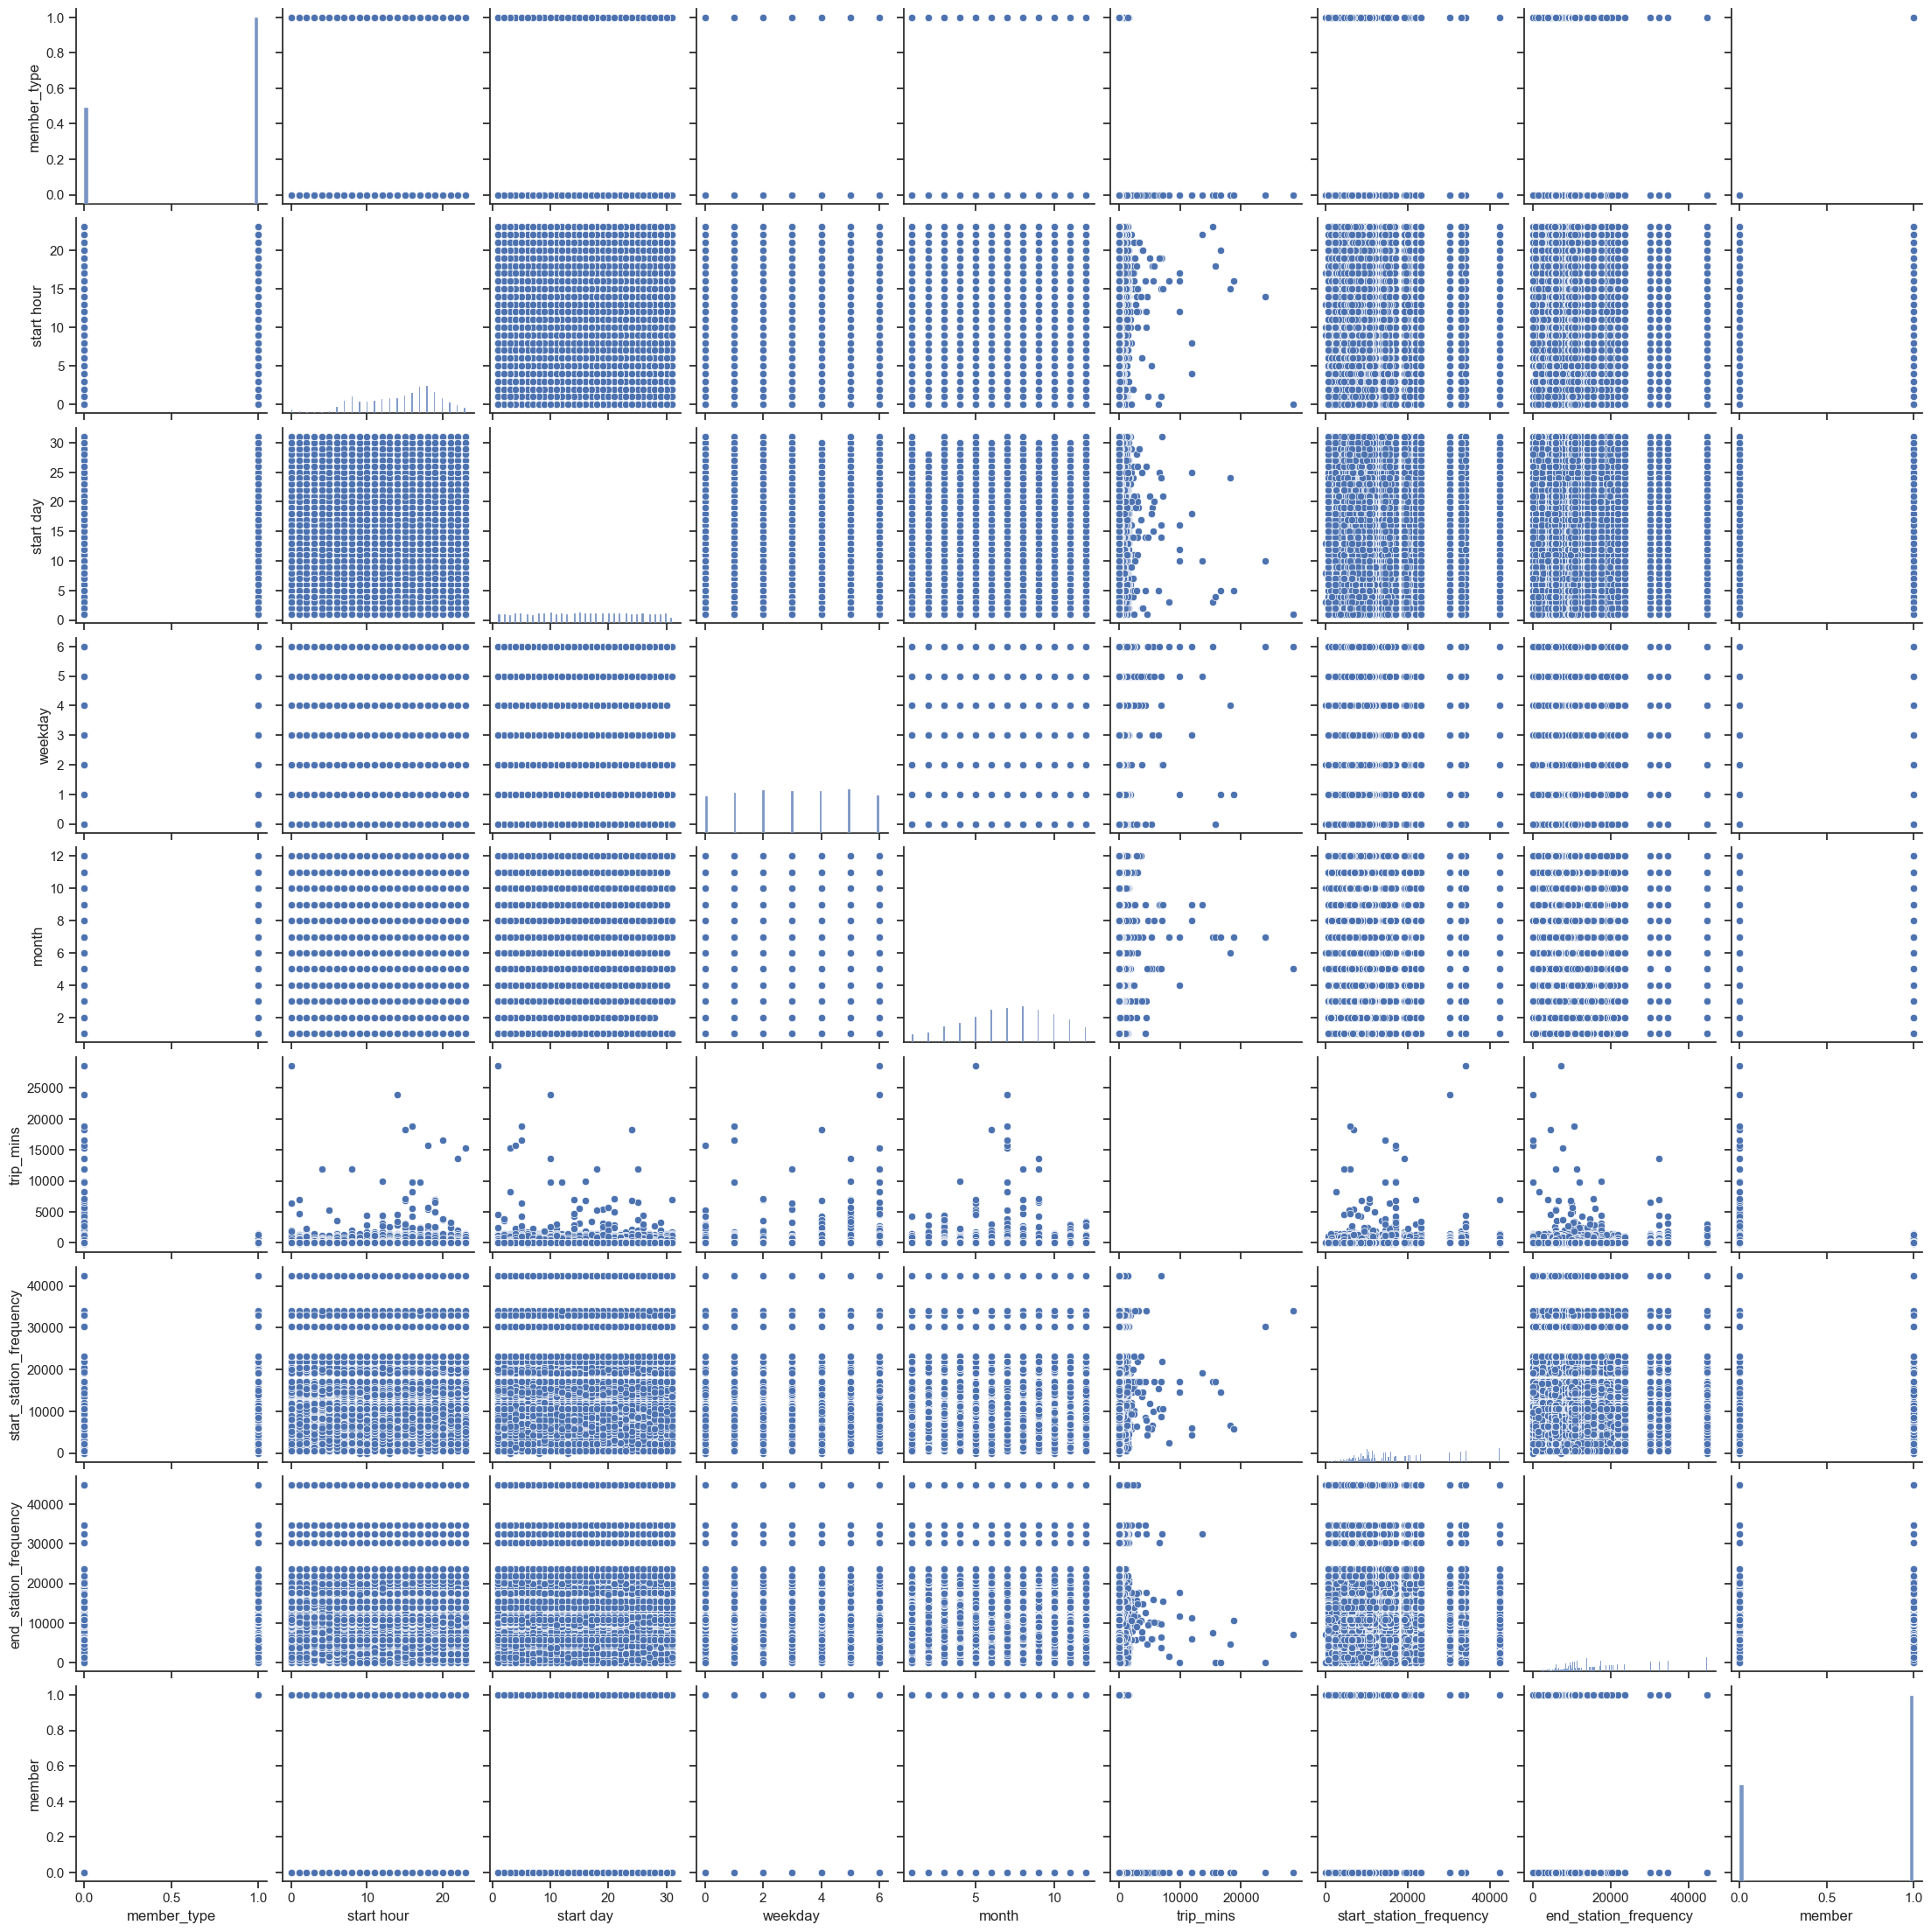

In [102]:
PairPlot = sns.pairplot(citi_2)

### Looking at the pairplot we can see a few trends. They may not be correlations but for instance we can see, that the most popular months are the summer months of June, July, and August with hires peaking in August. We also tend to see longer trips in those warmer months. We can also look at the start hour and notice some trends. Morning hires peak at around 8am before falling off, then rising in the afternoon hitting the daily high at around 6pm. We can also gather that afternoons tend to have more hires overall as opposed to mornings.

## Categorical plot

### Find mean trip length to define categories

In [47]:
citi_2['trip_mins'].describe()

count    892281.000000
mean         13.683778
std          81.621323
min         -55.520000
25%           4.500000
50%           7.180000
75%          12.150000
max       28541.500000
Name: trip_mins, dtype: float64

In [48]:
citi_2.loc[citi_2['trip_mins'] < 10, 'trip_length'] = 'Short trip'

In [49]:
citi_2.loc[(citi_2['trip_mins'] >= 10) & (citi_2['trip_mins'] <= 15)  , 'trip_length'] = 'Average trip'

In [50]:
citi_2.loc[citi_2['trip_mins'] > 15, 'trip_length'] = 'Long trip'

<Axes: xlabel='trip_mins', ylabel='Count'>

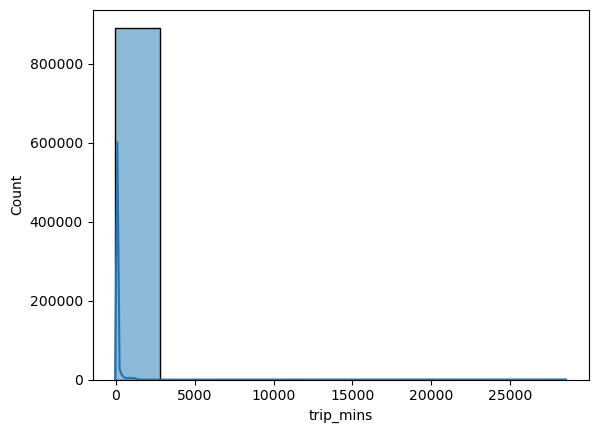

In [51]:
sns.histplot(citi_2['trip_mins'], bins = 10, kde = True)

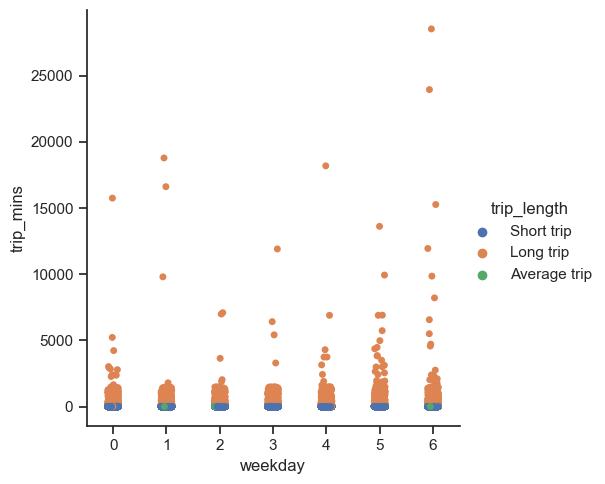

In [52]:
sns.set(style="ticks")
g = sns.catplot(x="weekday", y="trip_mins", hue="trip_length", data=citi_2)

In [53]:
citi_2['trip_length'].value_counts()

Short trip      600320
Long trip       166664
Average trip    125297
Name: trip_length, dtype: int64

### Looking at this categorical plot we can see that there are a lot of outliers. We can see by looking at our values that short trips have the vast majority, but we have a LOT of long trip outliers that may be skewing our visualization. We can further investigate this and address it moving forward.

# Questions

### What are the busiest days for hires?

#### As we could see from the pairing plot the busiest days of the week are typically weekdays. With the peak hitting on friday. We may be able to attribute people using our services as transportation to work or school which primarily operates during weekdays.

### What are the busiest times of day?

#### We can see from our pairing plot the busiest hour of the morning is 8am, but most business comes in the afternoon with the peak time being 6pm.

### How long do riders ride on average?

In [54]:
citi22['trip_mins'].describe()

count    892281.000000
mean         13.683778
std          81.621323
min         -55.520000
25%           4.500000
50%           7.180000
75%          12.150000
max       28541.500000
Name: trip_mins, dtype: float64

#### Using basic statistical evaluation we can see on average people tend to spend around 13 - 14 minutes per ride.

### What are the most popular stations for riders?

In [55]:
citi22['start_station_name'].value_counts()[:20]

Grove St PATH                                   42455
South Waterfront Walkway - Sinatra Dr & 1 St    34130
Hoboken Terminal - River St & Hudson Pl         32899
Hoboken Terminal - Hudson St & Hudson Pl        30165
City Hall - Washington St & 1 St                23214
Newport Pkwy                                    21907
Hamilton Park                                   20431
Newport PATH                                    19917
Hoboken Ave at Monmouth St                      19446
Marin Light Rail                                19167
12 St & Sinatra Dr N                            17060
14 St Ferry - 14 St & Shipyard Ln               16994
Columbus Dr at Exchange Pl                      16676
Hudson St & 4 St                                15828
Harborside                                      15723
11 St & Washington St                           15460
Washington St                                   15064
Liberty Light Rail                              14493
8 St & Washington St        

In [56]:
citi22['end_station_name'].value_counts()[:20]

Grove St PATH                                   44730
South Waterfront Walkway - Sinatra Dr & 1 St    34750
Hoboken Terminal - River St & Hudson Pl         32417
Hoboken Terminal - Hudson St & Hudson Pl        30220
City Hall - Washington St & 1 St                23591
Newport Pkwy                                    21800
Hamilton Park                                   20716
Hoboken Ave at Monmouth St                      20168
Newport PATH                                    19858
Marin Light Rail                                18896
14 St Ferry - 14 St & Shipyard Ln               17585
12 St & Sinatra Dr N                            17518
Columbus Dr at Exchange Pl                      17315
Harborside                                      15880
Hudson St & 4 St                                15793
11 St & Washington St                           15471
Washington St                                   15178
Liberty Light Rail                              14741
City Hall                   

#### Using a simple value_counts function we can determine the top 10 stations for riders for starting and stopping their ride.

## Export dataframes

In [108]:
citi22.to_pickle(os.path.join(path, '02 Data','clean', 'citi22.pkl'))
citi_2.to_pickle(os.path.join(path, '02 Data','clean', 'citi_2.pkl'))
citi22.to_csv(os.path.join(path, '02 Data','clean', 'citi22.csv'))